In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/march-machine-learning-mania-2024/Conferences.csv
/kaggle/input/march-machine-learning-mania-2024/sample_submission.csv
/kaggle/input/march-machine-learning-mania-2024/WNCAATourneyDetailedResults.csv
/kaggle/input/march-machine-learning-mania-2024/WRegularSeasonCompactResults.csv
/kaggle/input/march-machine-learning-mania-2024/MNCAATourneySeedRoundSlots.csv
/kaggle/input/march-machine-learning-mania-2024/MRegularSeasonDetailedResults.csv
/kaggle/input/march-machine-learning-mania-2024/MNCAATourneyCompactResults.csv
/kaggle/input/march-machine-learning-mania-2024/MGameCities.csv
/kaggle/input/march-machine-learning-mania-2024/WGameCities.csv
/kaggle/input/march-machine-learning-mania-2024/MSeasons.csv
/kaggle/input/march-machine-learning-mania-2024/WNCAATourneySlots.csv
/kaggle/input/march-machine-learning-mania-2024/MSecondaryTourneyTeams.csv
/kaggle/input/march-machine-learning-mania-2024/2024_tourney_seeds.csv
/kaggle/input/march-machine-learning-mania-2024/Cities.csv
/

In [2]:
os.listdir('../input/march-machine-learning-mania-2024')

['Conferences.csv',
 'sample_submission.csv',
 'WNCAATourneyDetailedResults.csv',
 'WRegularSeasonCompactResults.csv',
 'MNCAATourneySeedRoundSlots.csv',
 'MRegularSeasonDetailedResults.csv',
 'MNCAATourneyCompactResults.csv',
 'MGameCities.csv',
 'WGameCities.csv',
 'MSeasons.csv',
 'WNCAATourneySlots.csv',
 'MSecondaryTourneyTeams.csv',
 '2024_tourney_seeds.csv',
 'Cities.csv',
 'MTeamSpellings.csv',
 'MRegularSeasonCompactResults.csv',
 'MSecondaryTourneyCompactResults.csv',
 'WTeams.csv',
 'MNCAATourneySlots.csv',
 'MNCAATourneySeeds.csv',
 'MMasseyOrdinals_thruSeason2024_day128.csv',
 'WNCAATourneyCompactResults.csv',
 'WSeasons.csv',
 'WNCAATourneySeeds.csv',
 'MTeamCoaches.csv',
 'MConferenceTourneyGames.csv',
 'WRegularSeasonDetailedResults.csv',
 'MNCAATourneyDetailedResults.csv',
 'WTeamSpellings.csv',
 'MTeamConferences.csv',
 'MTeams.csv',
 'WTeamConferences.csv']

In [3]:
R_PATH = '../input/march-machine-learning-mania-2024/'

In [4]:
# Helper files

def get_data_from_file(file_name, w=False, both=True):
    if both:
        try:
            m_data = pd.read_csv(R_PATH + "M" + file_name + ".csv")
            w_data = pd.read_csv(R_PATH + "W" + file_name + ".csv")
        except:
            m_data = pd.read_csv(R_PATH + "M" + file_name + ".csv", encoding='latin1')
            w_data = pd.read_csv(R_PATH + "W" + file_name + ".csv", encoding='latin1')

        data = pd.concat((m_data, w_data), ignore_index=True)
        # data = m_data.append(w_data, ignore_index=True) #depreciated? :(

        return data

    else:
        if w:
            try:
                w_data = pd.read_csv(R_PATH + "W" + file_name + ".csv")
            except:
                w_data = pd.read_csv(R_PATH + "W" + file_name + ".csv", encoding='latin1')

            return w_data
        else:
            try:
                m_data = pd.read_csv(R_PATH + "M" + file_name + ".csv")
            except:
                m_data = pd.read_csv(R_PATH + "M" + file_name + ".csv", encoding='latin1')

            return m_data

def data_lookup(data, col1, col2, item, season=0):
    if len(data.index[data[col1] == item]) == 1:
        return data.at[data.index[data[col1] == item][0], col2]
    else:
        assert season != 0, "there's more than one of em"
        season_data = data[data['Season'] == season]
        return season_data.at[season_data.index[season_data[col1] == item][0], col2]
    
def extract_number(string):
    number_str = ""
    for char in string:
        if char.isdigit():
            number_str += char
    if number_str:
        return int(number_str)
    else:
        return None

In [5]:
seed_data = get_data_from_file("NCAATourneySeeds", both=False, w=False)
data_lookup(seed_data, "TeamID", "Seed", 1314, season=2008)

'W01'

In [6]:
# slot, team1, team2
tourney_structure = [
    ["R1W1", "W01", "W16"],
    ["R1W8", "W08", "W09"],
    ["R1W5", "W05", "W12"],
    ["R1W4", "W04", "W13"],
    ["R1W6", "W06", "W11"],
    ["R1W3", "W03", "W14"],
    ["R1W7", "W07", "W10"],
    ["R1W2", "W02", "W15"],

    ["R1X1", "X01", "X16"],
    ["R1X8", "X08", "X09"],
    ["R1X5", "X05", "X12"],
    ["R1X4", "X04", "X13"],
    ["R1X6", "X06", "X11"],
    ["R1X3", "X03", "X14"],
    ["R1X7", "X07", "X10"],
    ["R1X2", "X02", "X15"],

    ["R1Y1", "Y01", "Y16"],
    ["R1Y8", "Y08", "Y09"],
    ["R1Y5", "Y05", "Y12"],
    ["R1Y4", "Y04", "Y13"],
    ["R1Y6", "Y06", "Y11"],
    ["R1Y3", "Y03", "Y14"],
    ["R1Y7", "Y07", "Y10"],
    ["R1Y2", "Y02", "Y15"],

    ["R1Z1", "Z01", "Z16"],
    ["R1Z8", "Z08", "Z09"],
    ["R1Z5", "Z05", "Z12"],
    ["R1Z4", "Z04", "Z13"],
    ["R1Z6", "Z06", "Z11"],
    ["R1Z3", "Z03", "Z14"],
    ["R1Z7", "Z07", "Z10"],
    ["R1Z2", "Z02", "Z15"],

    ["R2W1", 0, 1],
    ["R2W4", 2, 3],
    ["R2W3", 4, 5],
    ["R2W2", 6, 7],
    ["R2X1", 8, 9],
    ["R2X4", 10, 11],
    ["R2X3", 12, 13],
    ["R2X2", 14, 15],
    ["R2Y1", 16, 17],
    ["R2Y4", 18, 19],
    ["R2Y3", 20, 21],
    ["R2Y2", 22, 23],
    ["R2Z1", 24, 25],
    ["R2Z4", 26, 27],
    ["R2Z3", 28, 29],
    ["R2Z2", 30, 31],

    ["R3W1", 32, 33],
    ["R3W2", 34, 35],
    ["R3X1", 36, 37],
    ["R3X2", 38, 39],
    ["R3Y1", 40, 41],
    ["R3Y2", 42, 43],
    ["R3Z1", 44, 45],
    ["R3Z2", 46, 47],

    ["R4W1", 48, 49],
    ["R4X1", 50, 51],
    ["R4Y1", 52, 53],
    ["R4Z1", 54, 55],

    ["R5WX", 56, 57],
    ["R5YZ", 58, 59],

    ["R6CH", 60, 61],
]

In [7]:
# dataset gen

def add_metric_diff(tourney_data, metric_data, metric):
    # add team A metric minus team B metric
    w_metric_list = []
    l_metric_list = []

    for index, row in tourney_data.iterrows():
        team1ID = row['WTeamID']
        team2ID = row['LTeamID']
        metric_data_season = metric_data[metric_data['Season'] == row['Season']]

        team1score = (np.mean(np.array(metric_data_season[metric_data_season['WTeamID'] == team1ID]['W' + metric])) + np.mean(np.array(metric_data_season[metric_data_season['LTeamID'] == team1ID]['L' + metric]))) / 2
        team2score = (np.mean(np.array(metric_data_season[metric_data_season['WTeamID'] == team2ID]['W' + metric])) + np.mean(np.array(metric_data_season[metric_data_season['LTeamID'] == team2ID]['L' + metric]))) / 2

        if np.isnan(team1score):
            mean1 = np.mean(np.array(metric_data_season[metric_data_season['WTeamID'] == team1ID]['W' + metric]))
            mean2 = np.mean(np.array(metric_data_season[metric_data_season['LTeamID'] == team1ID]['L' + metric]))

            assert not (np.isnan(mean1) and np.isnan(mean2))

            if np.isnan(mean1):
                team1score = mean2
            else:
                team1score = mean1

        if np.isnan(team2score):
            mean1 = np.mean(np.array(metric_data_season[metric_data_season['WTeamID'] == team2ID]['W' + metric]))
            mean2 = np.mean(np.array(metric_data_season[metric_data_season['LTeamID'] == team2ID]['L' + metric]))

            assert not (np.isnan(mean1) and np.isnan(mean2))

            if np.isnan(mean1):
                team2score = mean2
            else:
                team2score = mean1


        w_metric_list.append(team1score)
        l_metric_list.append(team2score)

    tourney_data[metric + 'DiffAdj'] = tourney_data['flip'] * (np.array(w_metric_list) - np.array(l_metric_list))

    return tourney_data

def get_metric(team1ID, team2ID, metric_data, metric, season):
    # return team A metric minus team B metric
    warnings.simplefilter(action='ignore', category=RuntimeWarning)
    metric_data_season = metric_data[metric_data['Season'] == season]

    team1score = (np.mean(np.array(metric_data_season[metric_data_season['WTeamID'] == team1ID]['W' + metric])) + np.mean(np.array(metric_data_season[metric_data_season['LTeamID'] == team1ID]['L' + metric]))) / 2
    team2score = (np.mean(np.array(metric_data_season[metric_data_season['WTeamID'] == team2ID]['W' + metric])) + np.mean(np.array(metric_data_season[metric_data_season['LTeamID'] == team2ID]['L' + metric]))) / 2

    if np.isnan(team1score):
        mean1 = np.mean(np.array(metric_data_season[metric_data_season['WTeamID'] == team1ID]['W' + metric]))
        mean2 = np.mean(np.array(metric_data_season[metric_data_season['LTeamID'] == team1ID]['L' + metric]))

        assert not (np.isnan(mean1) and np.isnan(mean2))

        if np.isnan(mean1):
            team1score = mean2
        else:
            team1score = mean1

    if np.isnan(team2score):
        mean1 = np.mean(np.array(metric_data_season[metric_data_season['WTeamID'] == team2ID]['W' + metric]))
        mean2 = np.mean(np.array(metric_data_season[metric_data_season['LTeamID'] == team2ID]['L' + metric]))

        assert not (np.isnan(mean1) and np.isnan(mean2))

        if np.isnan(mean1):
            team2score = mean2
        else:
            team2score = mean1

    return team1score - team2score

In [8]:
# get dataset

tourney_data = get_data_from_file("NCAATourneyCompactResults", both=True)
metric_data = get_data_from_file("RegularSeasonDetailedResults", both=True)
yearList = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022, 2023]
metrics = ['FGM','FGA','FGM3','FGA3','FTM','FTA','OR','DR','Ast','TO','Stl','Blk','PF']

tourney_data = tourney_data[tourney_data['Season'].isin(yearList)]
tourney_data['ScoreDiff'] = tourney_data['WScore'] - tourney_data['LScore']
seed_data = get_data_from_file("NCAATourneySeeds", both=True)

w_seed_list = []
l_seed_list = []
for index, row in tourney_data.iterrows():
    w_seed_list.append(extract_number(data_lookup(seed_data, "TeamID", "Seed", row['WTeamID'], season=row['Season'])))
    l_seed_list.append(extract_number(data_lookup(seed_data, "TeamID", "Seed", row['LTeamID'], season=row['Season'])))
    
tourney_data['WSeed'] = w_seed_list
tourney_data['LSeed'] = l_seed_list
tourney_data['SeedDiff'] = tourney_data['WSeed'] - tourney_data['LSeed']

tourney_data['flip'] = (tourney_data['WTeamID'] < tourney_data['LTeamID']) * 2 - 1
tourney_data['ScoreDiffAdj'] = tourney_data['ScoreDiff'] * tourney_data['flip']
tourney_data['SeedDiffAdj'] = tourney_data['SeedDiff'] * tourney_data['flip']

tourney_data_no_ot = tourney_data[tourney_data['NumOT'] == 0]

import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)
pd.set_option('mode.chained_assignment', None)

for metric in metrics:
    print(metric, end=' ')
    tourney_data_no_ot = add_metric_diff(tourney_data_no_ot, metric_data, metric)
    
tourney_data_w = tourney_data_no_ot[tourney_data_no_ot['WTeamID'] > 3000]
tourney_data_m = tourney_data_no_ot[tourney_data_no_ot['WTeamID'] < 3000]

FGM FGA FGM3 FGA3 FTM FTA OR DR Ast TO Stl Blk PF 

In [9]:
tourney_data_m.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,ScoreDiff,WSeed,...,FGA3DiffAdj,FTMDiffAdj,FTADiffAdj,ORDiffAdj,DRDiffAdj,AstDiffAdj,TODiffAdj,StlDiffAdj,BlkDiffAdj,PFDiffAdj
1584,2010,134,1115,61,1457,44,N,0,17,16,...,-1.596380,4.069231,5.350830,-1.024434,1.142685,1.714178,4.628959,-1.947360,-0.217044,3.769532
1585,2010,136,1124,68,1358,59,N,0,9,3,...,-5.360119,-1.208333,-2.529762,-0.217262,2.336310,-5.791667,0.818452,-1.297619,4.366071,-1.630952
1586,2010,136,1139,77,1431,59,N,0,18,5,...,2.098901,1.716575,-0.833333,-1.483516,-2.096612,-2.488095,-0.626832,-1.721154,-0.746795,-0.792125
1588,2010,136,1242,90,1250,74,N,0,16,1,...,3.453125,-0.457102,0.020739,1.747443,-0.505966,-0.994034,-0.446875,2.050568,2.758523,1.467614
1589,2010,136,1243,82,1317,62,N,0,20,2,...,3.010584,0.395422,3.046786,4.578506,-2.276916,1.723994,-0.928571,2.929805,1.349253,5.101299


# Men's Model

In [10]:
test_year = 2019
metrics = ['Seed', 'FGM','FGA','FGM3','FGA3','FTM','FTA','OR','DR','Ast','TO','Stl','Blk','PF']
diff_metrics = [metric + 'DiffAdj' for metric in metrics]

X = tourney_data_m[tourney_data_m['Season'] != test_year][diff_metrics]
y = tourney_data_m[tourney_data_m['Season'] != test_year]['ScoreDiffAdj']

from sklearn.linear_model import LinearRegression

model_m_2019 = LinearRegression()
model_m_2019.fit(X, y)

print('Score diff =', round(model_m_2019.intercept_, 3), '+')
for i in range(len(metrics)):
    print("%+.3f" % round(model_m_2019.coef_[i], 3), '*', metrics[i])

Score diff = -0.693 +
-0.905 * Seed
+1.678 * FGM
-1.272 * FGA
-0.625 * FGM3
+0.749 * FGA3
+0.728 * FTM
-0.859 * FTA
+1.658 * OR
+0.536 * DR
-0.533 * Ast
-1.121 * TO
+1.041 * Stl
+0.133 * Blk
+0.175 * PF


# Women's Model

In [11]:
test_year = 2019
metrics = ['Seed', 'FGM','FGA','FGM3','FGA3','FTM','FTA','OR','DR','Ast','TO','Stl','Blk','PF']
diff_metrics = [metric + 'DiffAdj' for metric in metrics]

X = tourney_data_w[tourney_data_w['Season'] != test_year][diff_metrics]
y = tourney_data_w[tourney_data_w['Season'] != test_year]['ScoreDiffAdj']

from sklearn.linear_model import LinearRegression

model_w_2019 = LinearRegression()
model_w_2019.fit(X, y)

print('Score diff =', round(model_w_2019.intercept_, 3), '+')
for i in range(len(metrics)):
    print("%+.3f" % round(model_w_2019.coef_[i], 3), '*', metrics[i])

Score diff = 1.362 +
-1.765 * Seed
+0.855 * FGM
-0.819 * FGA
+1.173 * FGM3
-0.353 * FGA3
+0.608 * FTM
-0.848 * FTA
+1.313 * OR
+0.755 * DR
+0.624 * Ast
-1.500 * TO
+1.312 * Stl
+0.712 * Blk
+0.122 * PF


# Submission

In [12]:
import random
import scipy.stats as st

metrics = ['Seed', 'FGM','FGA','FGM3','FGA3','FTM','FTA','OR','DR','Ast','TO','Stl','Blk','PF']
hparams = [8, 8]
metric_data = get_data_from_file("RegularSeasonDetailedResults", both=True)

def get_a_winner(teamSeed1, teamSeed2, seed_data, test_year, model, w=False, return_prob=False, deterministic=False):
    warnings.filterwarnings(action='ignore', category=UserWarning)
    team1ID = data_lookup(seed_data, "Seed", "TeamID", teamSeed1, season=test_year)
    team2ID = data_lookup(seed_data, "Seed", "TeamID", teamSeed2, season=test_year)

    metric_diffs_list = [extract_number(teamSeed1) - extract_number(teamSeed2)]

    for metric in metrics[1:]:
        metric_diffs_list.append(get_metric(team1ID, team2ID, metric_data, metric, test_year))

    if w:
        prob = st.norm.cdf(model.predict([metric_diffs_list]) / hparams[1])
    else:
        prob = st.norm.cdf(model.predict([metric_diffs_list]) / hparams[0])

    if return_prob:
        return prob

    if deterministic:
        if prob > 0.5:
            return teamSeed1
        else:
            return teamSeed2

    if random.random() < prob:
        return teamSeed1
    else:
        return teamSeed2
    
    
def fill_bracket(structure, get_a_winner, seed_data, test_year, model, w=False, return_prob=False, deterministic=False):
    filled_bracket = []

    for i in range(32): # first round
        filled_bracket.append([structure[i][0], get_a_winner(structure[i][1], structure[i][2], seed_data, test_year, model, w=w, deterministic=deterministic, return_prob=return_prob)])

    for j in range(32, 63): #subsequent rounds
        filled_bracket.append([structure[j][0], get_a_winner(filled_bracket[structure[j][1]][1], filled_bracket[structure[j][2]][1], seed_data, test_year, model, w=w, deterministic=deterministic, return_prob=return_prob)])

    return filled_bracket

In [13]:
tourney_seeds = pd.read_csv(R_PATH + '2024_tourney_seeds.csv')
PATH = '../working/'
num_brackets_m = 5
num_brackets_w = 5
row_id = 0

with open(PATH + "my_submission.csv", "w") as file:
    file.write(f"RowId,Tournament,Bracket,Slot,Team\n")
    
    seed_data = tourney_seeds[tourney_seeds['Tournament'] == 'M']
    
    for bracket in range(num_brackets_m):
        if bracket % 2 == 0:
            print(bracket)
        m_bracket = fill_bracket(tourney_structure, get_a_winner, seed_data, 2024, model_m_2019, w=False)

        for game in m_bracket:
            file.write(f"{row_id},M,{bracket+1},{game[0]},{game[1]}\n")
            row_id += 1
            
    seed_data = tourney_seeds[tourney_seeds['Tournament'] == 'W']

    for bracket in range(num_brackets_w):
        if bracket % 2 == 0:
            print(bracket)
            
        w_bracket = fill_bracket(tourney_structure, get_a_winner, seed_data, 2024, model_w_2019, w=True)
        
        for game in w_bracket:
            file.write(f"{row_id},W,{bracket+1},{game[0]},{game[1]}\n")
            row_id += 1

0
2
4
0
2
4


# Analysis

## Visualize Brackets

In [14]:
import matplotlib.pyplot as plt

def plot_bracket(team_names, size=(15,6), tight_layout=False, save_fig_name=None):

    if len(team_names) == 127:
        bracket = team_names
        first_round = bracket[:32] + bracket[48:64] + bracket[32:48]
        # first_round = bracket[16:32] + bracket[:16] + bracket[32:64]
        bracket = bracket[64:]
        rounds = [first_round,
                  bracket[:16] + bracket[24:32] + bracket[16:24],
                  bracket[32:40] + bracket[44:48] + bracket[40:44],
                  bracket[48:52] + bracket[54:56] + bracket[52:54],
                  bracket[56:58] + bracket[59:60] + bracket[58:59],
                  bracket[60:62],
                  bracket[62:63]]

    elif len(team_names) == 63:
        bracket = team_names
        rounds = [bracket[:16] + bracket[24:32] + bracket[16:24],
                  bracket[32:40] + bracket[44:48] + bracket[40:44],
                  bracket[48:52] + bracket[54:56] + bracket[52:54],
                  bracket[56:58] + bracket[59:60] + bracket[58:59],
                  bracket[60:62],
                  bracket[62:63]]

    for round in rounds:
        print(round)

    num_rounds = len(rounds)
    num_teams = len(rounds[0])
    multiplier = 0.6

    fig, ax = plt.subplots(figsize=size)
    ax.set_xlim([0, num_rounds + 1])
    ax.set_ylim([0, num_teams / 2])

    # Calculate column height and spacing
    column_height = num_teams / (2 ** (num_rounds - 1))

    prev_ys = []
    new_prev_ys = []

    # Plotting the team names
    for r, round_teams in enumerate(rounds):
      round_size = len(round_teams)
      round_height = column_height * round_size

      for t, team_name in enumerate(round_teams):
        if t < round_size // 2:  # First half of teams
          x = r * multiplier
          if len(prev_ys) == 0:
            y = (column_height * (2 * t + 1)) - round_height / 2
          else:
            y = (prev_ys[2 * t] + prev_ys[2 * t + 1]) / 2
          new_prev_ys.append(y)
        else:  # Second half of teams
          x = num_rounds - (r * multiplier)
          if len(prev_ys) == 0:
            y = (column_height * (2 * (t - round_size // 2) + 1)) - round_height / 2
          else:
            y = (prev_ys[2 * t] + prev_ys[2 * t + 1]) / 2
          new_prev_ys.append(y)

        if r == num_rounds - 1:
          x = num_rounds / 2

        if team_name == rounds[-1][0]:
          ax.text(x, y, team_name, ha='center', va='center', fontsize=8, bbox=dict(facecolor='none', edgecolor='green'))
        else:
          ax.text(x, y, team_name, ha='center', va='center', fontsize=8)
      prev_ys = new_prev_ys
      new_prev_ys = []

    ax.invert_yaxis()
    ax.axis('off')
    if tight_layout:
      plt.tight_layout()
    plt.show()
    # plt.savefig(f'brackets_new_new/bracket{save_fig_name}.png', bbox_inches='tight')

In [15]:
# m deterministic

tourney_seeds = pd.read_csv(R_PATH + '2024_tourney_seeds.csv')
seed_data = tourney_seeds[tourney_seeds['Tournament'] == 'M']
row_id = 0

m_bracket = fill_bracket(tourney_structure, get_a_winner, seed_data, 2024, model_m_2019, w=False, deterministic=True)

tourney_seeds = pd.read_csv(R_PATH + '2024_tourney_seeds.csv')
seed_data = tourney_seeds[tourney_seeds['Tournament'] == 'M']
name_data = get_data_from_file("Teams")
team_names = []
team_ids = []

for game in tourney_structure[:32]:
    team1ID = data_lookup(seed_data, "Seed", "TeamID", game[1], season=2024)
    team2ID = data_lookup(seed_data, "Seed", "TeamID", game[2], season=2024)
    teamName = data_lookup(name_data, "TeamID", "TeamName", team1ID, season=2024)
    team2Name = data_lookup(name_data, "TeamID", "TeamName", team2ID, season=2024)
    team_names.append(teamName)
    team_names.append(team2Name)
    team_ids.append(team1ID)
    team_ids.append(team2ID)


for game in m_bracket:
    team1ID = data_lookup(seed_data, "Seed", "TeamID", game[1], season=2024)
    teamName = data_lookup(name_data, "TeamID", "TeamName", team1ID, season=2024)
    team_names.append(teamName)
    team_ids.append(team1ID)
    row_id += 1

['Connecticut', 'Stetson', 'FL Atlantic', 'Northwestern', 'San Diego St', 'UAB', 'Auburn', 'Yale', 'BYU', 'Duquesne', 'Illinois', 'Morehead St', 'Washington St', 'Drake', 'Iowa St', 'S Dakota St', 'North Carolina', 'Wagner', 'Mississippi St', 'Michigan St', "St Mary's CA", 'Grand Canyon', 'Alabama', 'Col Charleston', 'Clemson', 'New Mexico', 'Baylor', 'Colgate', 'Dayton', 'Nevada', 'Arizona', 'Long Beach St', 'Houston', 'Longwood', 'Nebraska', 'Texas A&M', 'Wisconsin', 'James Madison', 'Duke', 'Vermont', 'Texas Tech', 'NC State', 'Kentucky', 'Oakland', 'Florida', 'Colorado', 'Marquette', 'WKU', 'Purdue', 'Grambling', 'Utah St', 'TCU', 'Gonzaga', 'McNeese St', 'Kansas', 'Samford', 'South Carolina', 'Oregon', 'Creighton', 'Akron', 'Texas', 'Colorado St', 'Tennessee', "St Peter's"]
['Connecticut', 'FL Atlantic', 'San Diego St', 'Auburn', 'BYU', 'Illinois', 'Washington St', 'Iowa St', 'North Carolina', 'Mississippi St', "St Mary's CA", 'Alabama', 'Clemson', 'Baylor', 'Dayton', 'Arizona', '

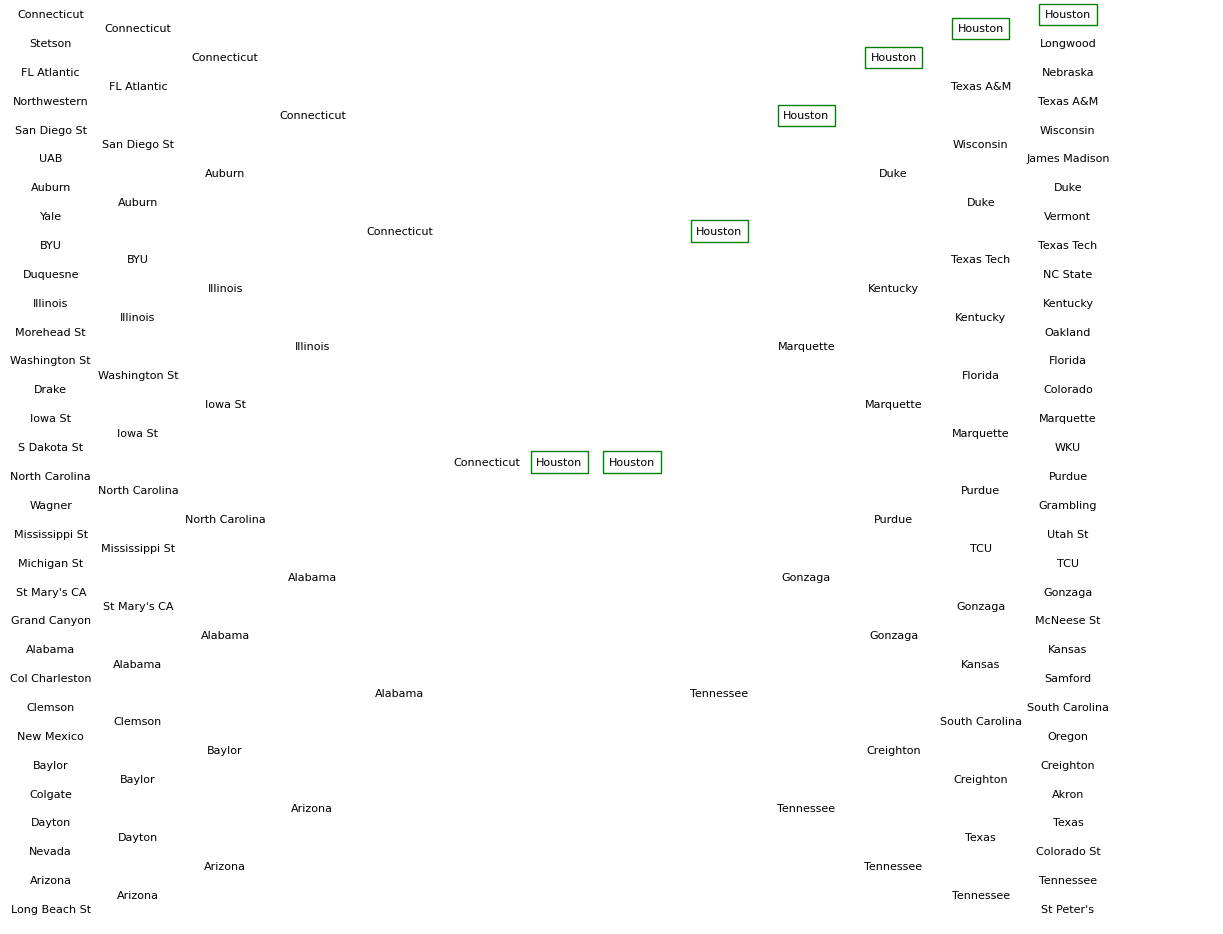

In [16]:
plot_bracket(team_names)

In [17]:
# w deterministic
tourney_seeds = pd.read_csv(R_PATH + '2024_tourney_seeds.csv')
seed_data = tourney_seeds[tourney_seeds['Tournament'] == 'W']
row_id = 0

w_bracket = fill_bracket(tourney_structure, get_a_winner, seed_data, 2024, model_w_2019, w=True, deterministic=True)

tourney_seeds = pd.read_csv(R_PATH + '2024_tourney_seeds.csv')
seed_data = tourney_seeds[tourney_seeds['Tournament'] == 'W']
name_data = get_data_from_file("Teams", w=True)
team_names = []
team_ids = []

for game in tourney_structure[:32]:
    team1ID = data_lookup(seed_data, "Seed", "TeamID", game[1], season=2024)
    team2ID = data_lookup(seed_data, "Seed", "TeamID", game[2], season=2024)
    teamName = data_lookup(name_data, "TeamID", "TeamName", team1ID, season=2024)
    team2Name = data_lookup(name_data, "TeamID", "TeamName", team2ID, season=2024)
    team_names.append(teamName)
    team_names.append(team2Name)
    team_ids.append(team1ID)
    team_ids.append(team2ID)


for game in w_bracket:
    team1ID = data_lookup(seed_data, "Seed", "TeamID", game[1], season=2024)
    teamName = data_lookup(name_data, "TeamID", "TeamName", team1ID, season=2024)
    team_names.append(teamName)
    team_ids.append(team1ID)
    row_id += 1

['South Carolina', 'Presbyterian', 'North Carolina', 'Michigan St', 'Oklahoma', 'FL Gulf Coast', 'Indiana', 'Fairfield', 'Nebraska', 'Texas A&M', 'Oregon St', 'E Washington', 'Mississippi', 'Marquette', 'Notre Dame', 'Kent', 'Texas', 'Drexel', 'Alabama', 'Florida St', 'Utah', 'S Dakota St', 'Gonzaga', 'UC Irvine', 'Tennessee', 'WI Green Bay', 'NC State', 'Chattanooga', 'Iowa St', 'Maryland', 'Stanford', 'Norfolk St', 'USC', 'TAM C. Christi', 'Kansas', 'Michigan', 'Baylor', 'Columbia', 'Virginia Tech', 'Marshall', 'Syracuse', 'Arizona', 'Connecticut', 'Jackson St', 'Duke', 'Richmond', 'Ohio St', 'Maine', 'Iowa', 'Holy Cross', 'West Virginia', 'Princeton', 'Colorado', 'Drake', 'Kansas St', 'Portland', 'Louisville', 'MTSU', 'LSU', 'Rice', 'Creighton', 'UNLV', 'UCLA', 'Cal Baptist']
['South Carolina', 'Michigan St', 'Oklahoma', 'Indiana', 'Nebraska', 'Oregon St', 'Mississippi', 'Notre Dame', 'Texas', 'Alabama', 'Utah', 'Gonzaga', 'Tennessee', 'NC State', 'Iowa St', 'Stanford', 'USC', 'Kans

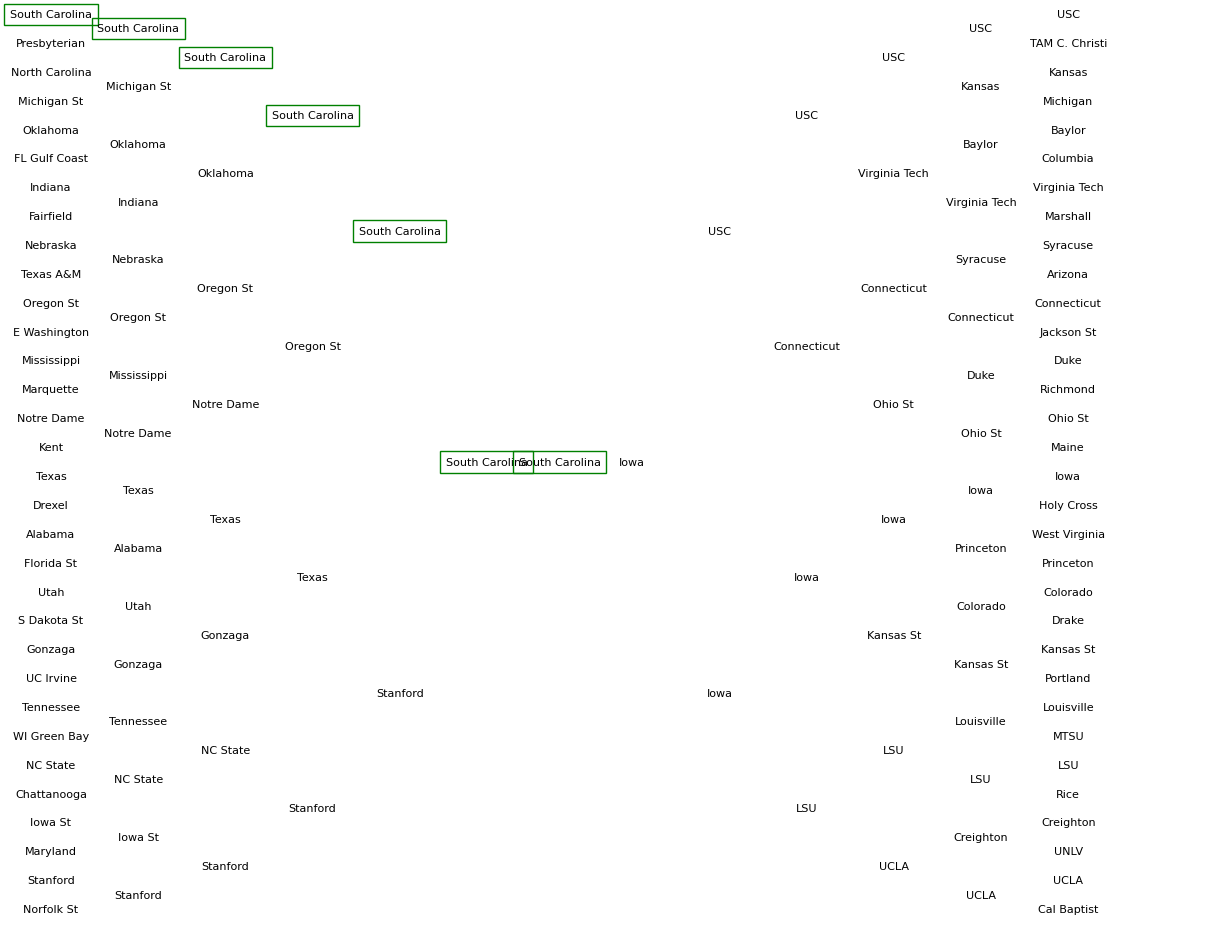

In [18]:
plot_bracket(team_names)

## Submission's Rounds Table

In [19]:
submission = pd.read_csv(PATH + "my_submission.csv")

m_submission = submission[submission['Tournament'] == 'M']
w_submission = submission[submission['Tournament'] == 'W']

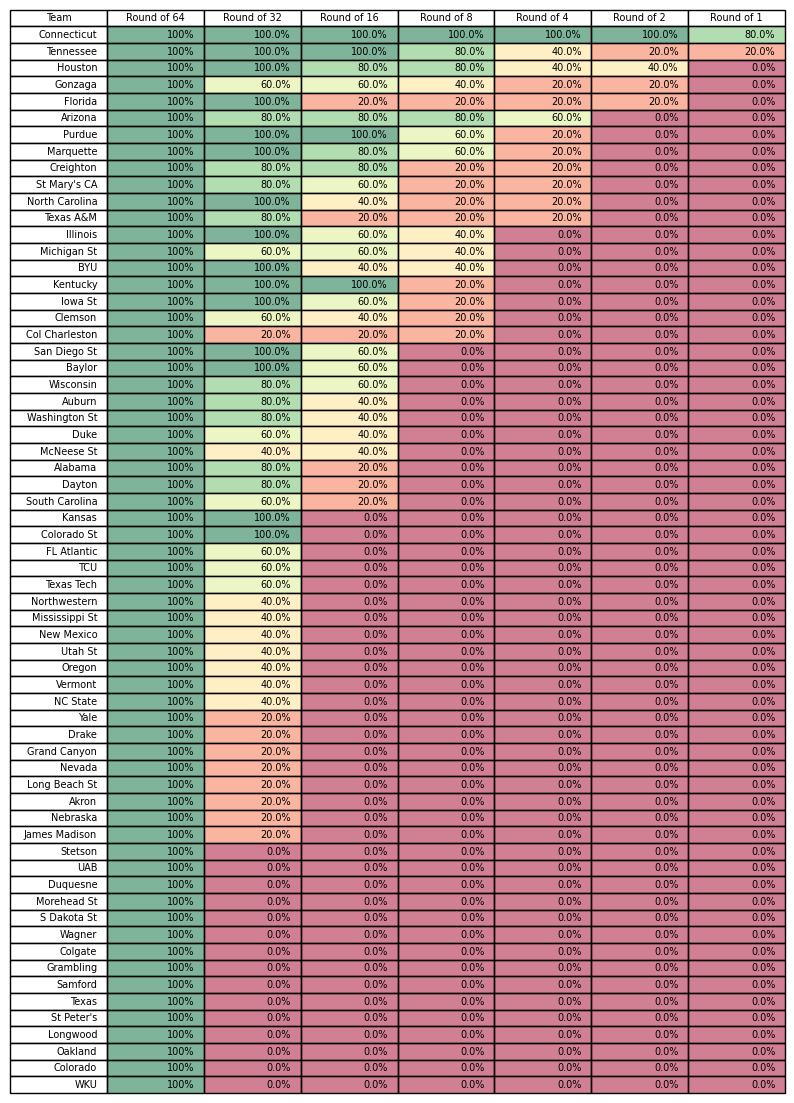

In [20]:
w = False

each_seed = []

for game in tourney_structure[:32]:
        each_seed.append(game[1])
        each_seed.append(game[2])

tour = 'W' if w else 'M'
tourney_seeds = pd.read_csv(R_PATH + '2024_tourney_seeds.csv')
seed_data = tourney_seeds[tourney_seeds['Tournament'] == tour]
name_data = get_data_from_file("Teams")
results = []
this_sub = w_submission if w else m_submission
num_brackets_in_submission = int(len(m_submission) / 63)

for seed in each_seed:
    team1ID = data_lookup(seed_data, "Seed", "TeamID", seed, season=2024)
    teamName = data_lookup(name_data, "TeamID", "TeamName", team1ID, season=2024)
    results.append([teamName])
    for round in range(7):
        if round == 0:
            results[-1].append(1)
        else:
            this_round = this_sub[this_sub['Slot'].str[:2] == 'R' + str(round)]
            results[-1].append(list(this_round['Team']).count(seed) / num_brackets_in_submission)
            

from  matplotlib.colors import LinearSegmentedColormap


data = sorted(results, key=lambda x: (x[-1], x[-2], x[-3], x[-4], x[-5], x[-6]), reverse=True)

values = np.array([row[1:] for row in data], dtype=float)

vals = values
norm = plt.Normalize(vals.min()-1, vals.max()+1)
colours = plt.cm.hot(norm(vals))
def cmap(input_val):
    if isinstance(input_val, str):
        return (1, 1, 1, 0.5)
    if input_val == 1:
        input_val = 0.99999
    input_val = float(input_val)
    return tuple(list(plt.get_cmap('RdYlGn')(input_val)[:3]) + [0.5])

data_str = [[value if (type(value) is str) else str(value*100)+'%' for value in row] for row in data]

plt.figure(figsize=(10, 6))
plt.table(cellText=data_str, colLabels=['Team'] + [f'Round of {2**(6-i)}' for i in range(values.shape[1])],
          cellColours=[[cmap(value) for value in row] for row in data],
          # cellColours=colours,
          loc='center')
plt.axis('off')
plt.show()

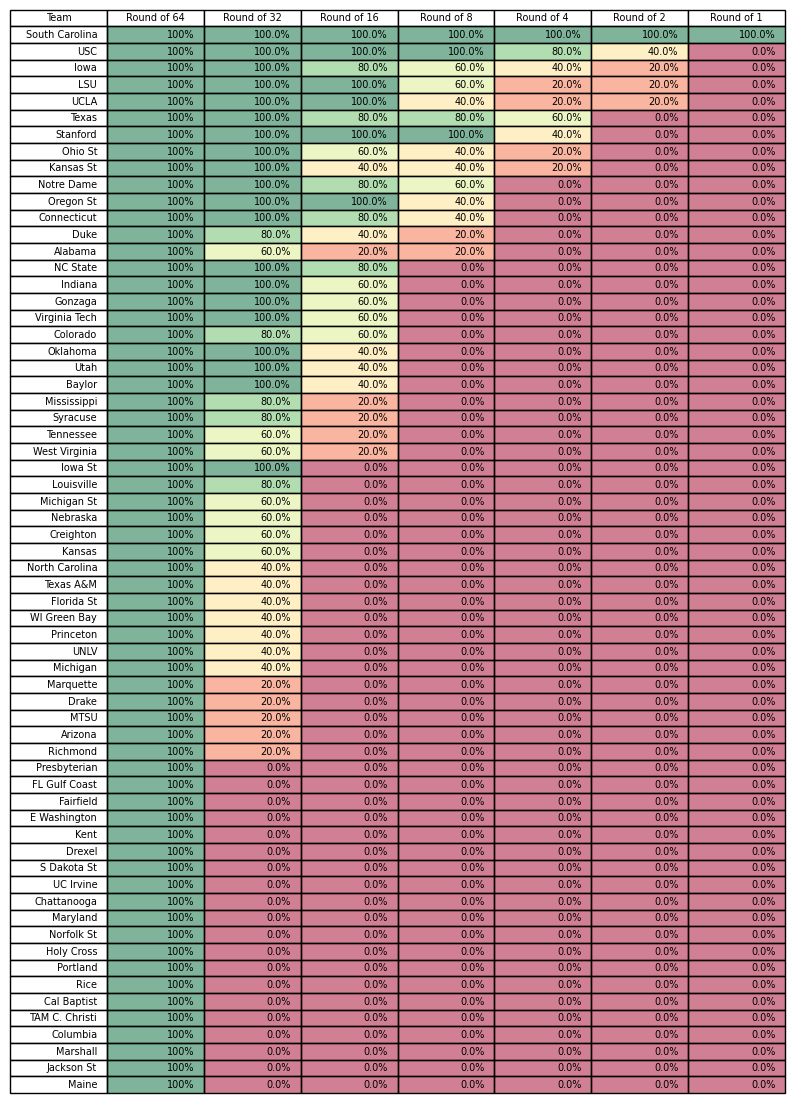

In [21]:
w = True

each_seed = []

for game in tourney_structure[:32]:
        each_seed.append(game[1])
        each_seed.append(game[2])

tour = 'W' if w else 'M'
tourney_seeds = pd.read_csv(R_PATH + '2024_tourney_seeds.csv')
seed_data = tourney_seeds[tourney_seeds['Tournament'] == tour]
name_data = get_data_from_file("Teams")
results = []
this_sub = w_submission if w else m_submission
num_brackets_in_submission = int(len(m_submission) / 63)

for seed in each_seed:
    team1ID = data_lookup(seed_data, "Seed", "TeamID", seed, season=2024)
    teamName = data_lookup(name_data, "TeamID", "TeamName", team1ID, season=2024)
    results.append([teamName])
    for round in range(7):
        if round == 0:
            results[-1].append(1)
        else:
            this_round = this_sub[this_sub['Slot'].str[:2] == 'R' + str(round)]
            results[-1].append(list(this_round['Team']).count(seed) / num_brackets_in_submission)
            

from  matplotlib.colors import LinearSegmentedColormap


data = sorted(results, key=lambda x: (x[-1], x[-2], x[-3], x[-4], x[-5], x[-6]), reverse=True)

values = np.array([row[1:] for row in data], dtype=float)

vals = values
norm = plt.Normalize(vals.min()-1, vals.max()+1)
colours = plt.cm.hot(norm(vals))
def cmap(input_val):
    if isinstance(input_val, str):
        return (1, 1, 1, 0.5)
    if input_val == 1:
        input_val = 0.99999
    input_val = float(input_val)
    return tuple(list(plt.get_cmap('RdYlGn')(input_val)[:3]) + [0.5])

data_str = [[value if (type(value) is str) else str(value*100)+'%' for value in row] for row in data]

plt.figure(figsize=(10, 6))
plt.table(cellText=data_str, colLabels=['Team'] + [f'Round of {2**(6-i)}' for i in range(values.shape[1])],
          cellColours=[[cmap(value) for value in row] for row in data],
          # cellColours=colours,
          loc='center')
plt.axis('off')
plt.show()